In [2]:
import sys
from pathlib import Path
import pandas as pd
import os
from IPython.display import display, Markdown  # Assuming you use these for display


# Set pandas display options to show more columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', 10)       # Limit to 10 rows for readability
pd.set_option('display.width', None)        # Let the display adjust to the window

# 2. Set the display width (optional but 
# often helpful)
#    'None' tries to detect terminal width. 
#    A large number (e.g., 1000) ensures no wrapping unless absolutely necessary.
pd.set_option('display.width', 1000) 


# Notebook cell
%load_ext autoreload
%autoreload 2

# Get root directory (assuming notebook is in root/notebooks/)
NOTEBOOK_DIR = Path.cwd()
ROOT_DIR = NOTEBOOK_DIR.parent if NOTEBOOK_DIR.name == 'notebooks' else NOTEBOOK_DIR

# Add src directory to Python path
sys.path.append(str(ROOT_DIR / 'src'))

# Verify path
print(f"Python will look in these locations:\n{sys.path}")


# --- Execute the processor ---
import utils


SOURCE_PATH, _ = utils.main_processor(
    data_dir='..\data ',  # search project ..\data    
    downloads_dir='',  # None searchs Downloads dir, '' omits search1'',  # None searchs Downloads dir, '' omits search1
    downloads_limit=60,  # search the first 10 files
    clean_name_override=None,  # override filename
    start_file_pattern='', # search for files starting with 'df_'
    contains_pattern='clean.parquet',  # search for files containing 'df_'
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Python will look in these locations:
['C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\python311.zip', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\DLLs', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\Lib', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv', '', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\win32', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\ping\\Files_win10\\python\\py311\\stocks\\src', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\setuptools\\_vendor', 'c:\\Users\\ping\\Files_win10\\python\\py311\\stocks\\src']


**Available ''' and containing 'clean.parquet'' files:**

- (1) `[DATA]` `2025-04-01_df_OHLCV_clean.parquet` <span style='color:#00ffff'>(14.60 MB, 2025-04-07 09:05)</span>

- (2) `[DATA]` `2025-04-02_df_OHLCV_clean.parquet` <span style='color:#00ffff'>(14.61 MB, 2025-04-07 09:31)</span>

- (3) `[DATA]` `2025-04-03_df_OHLCV_clean.parquet` <span style='color:#00ffff'>(14.51 MB, 2025-04-07 13:58)</span>

- (4) `[DATA]` `2025-04-04_df_OHLCV_clean.parquet` <span style='color:#00ffff'>(14.58 MB, 2025-04-07 14:08)</span>

- (5) `[DATA]` `2025-04-07_df_OHLCV_clean.parquet` <span style='color:#00ffff'>(14.50 MB, 2025-04-07 19:55)</span>

- (6) `[DATA]` `2025-04-08_df_OHLCV_clean.parquet` <span style='color:#00ffff'>(12.97 MB, 2025-04-08 19:14)</span>


Input a number to select file (1-6)



    **Selected paths:**
    - Source: `c:\Users\ping\Files_win10\python\py311\stocks\data\2025-04-08_df_OHLCV_clean.parquet`
    - Destination: `c:\Users\ping\Files_win10\python\py311\stocks\data\2025-04-08_df_OHLCV_clean_clean.parquet`
    

In [3]:
import pandas as pd
from IPython.display import display, Markdown  # Assuming you use these for display


# Set pandas display options to show more columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', 10)       # Limit to 10 rows for readability
pd.set_option('display.width', 1000) 

In [4]:
df_OHLCV = pd.read_parquet(SOURCE_PATH)
df_OHLCV.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 381520 entries, ('ILMN', Timestamp('2025-04-08 00:00:00')) to ('RF', Timestamp('2024-04-09 00:00:00'))
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Open       381520 non-null  float64
 1   High       381520 non-null  float64
 2   Low        381520 non-null  float64
 3   Close      381520 non-null  float64
 4   Adj Close  381520 non-null  float64
 5   Volume     381520 non-null  Int64  
 6   Adj Open   381520 non-null  float64
 7   Adj High   381520 non-null  float64
 8   Adj Low    381520 non-null  float64
dtypes: Int64(1), float64(8)
memory usage: 28.1+ MB


Processing 6 unique selection dates...
--- Calculation Summary ---
Total selection dates processed: 6
Skipped selections (no implementation date): 1
Skipped selections (no evaluation date): 1
Instances of missing/zero prices for individual stocks: 0
Calculated returns for 4 dates.
---------------------------

--- Portfolio Daily Returns ---
(Index represents the 'Evaluation Date' - the date the return is calculated for, based on the change from the previous trading day's close)
Date
2025-04-03    0.009101
2025-04-04   -0.050753
2025-04-07   -0.018254
2025-04-08   -0.001395
Name: Portfolio Daily Return, dtype: float64

--- Portfolio Cumulative Returns ---
(Index represents the 'Evaluation Date')
Date
2025-04-03    0.009101
2025-04-04   -0.042114
2025-04-07   -0.059600
2025-04-08   -0.060911
Name: Portfolio Daily Return, dtype: float64


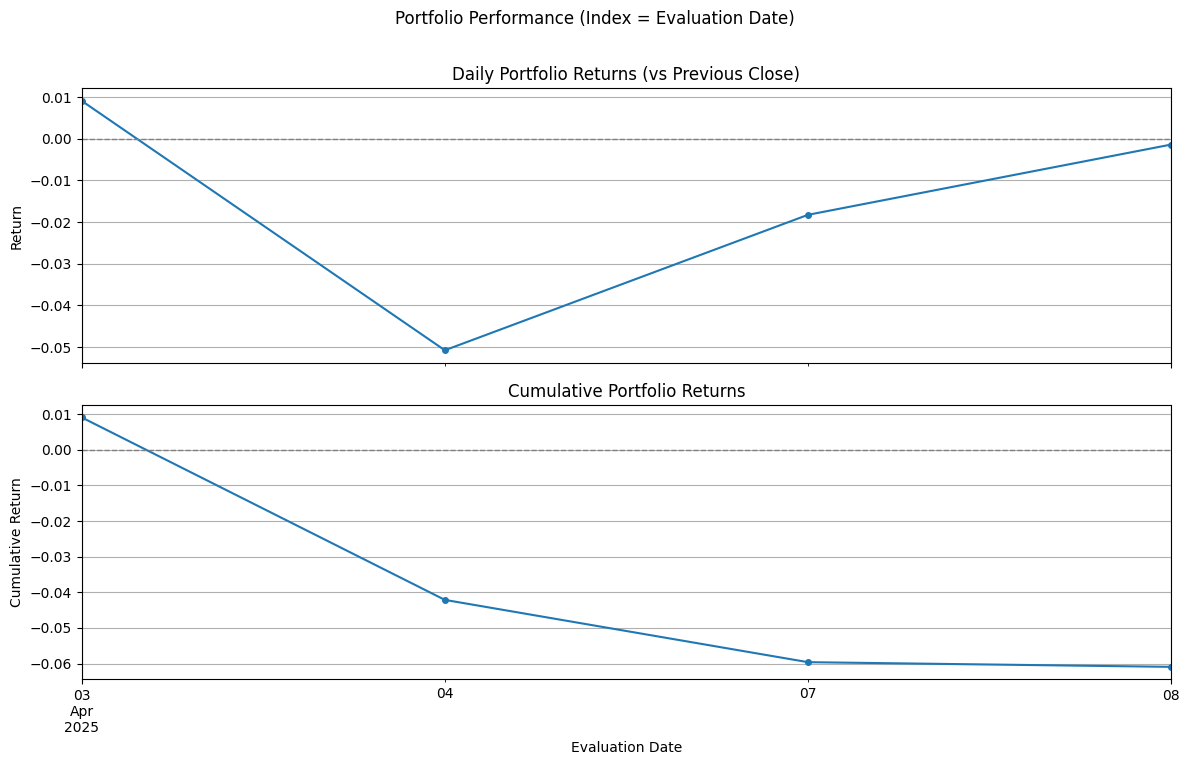

In [ ]:
import pandas as pd

def find_next_trading_date(current_date, all_trading_dates):
    """
    Finds the first trading date strictly after the given current_date.

    Args:
        current_date (pd.Timestamp): The date after which to find the next trading date.
        all_trading_dates (pd.DatetimeIndex): A sorted Series/Index of all available trading dates.

    Returns:
        pd.Timestamp or None: The next trading date, or None if not found.
    """
    # Find the index where the current_date would be inserted to maintain order
    idx = all_trading_dates.searchsorted(current_date, side='right')
    if idx < len(all_trading_dates):
        return all_trading_dates[idx]
    else:
        # No trading date found after current_date
        return None

def calculate_portfolio_performance(selections_file, df_ohlcv):
    """
    Calculates the daily returns of portfolios based on historical selections.

    Args:
        selections_file (str): Path to the stock_selections_history.csv file.
        df_ohlcv (pd.DataFrame): DataFrame with OHLCV data, indexed by (Ticker, Date).

    Returns:
        pd.Series: A Series containing the daily portfolio returns, indexed by date.
                   Returns None if inputs are invalid or data is missing.
    """
    # --- 1. Load and Prepare Selections Data ---
    try:
        selections_df = pd.read_csv(selections_file)
        selections_df['Date'] = pd.to_datetime(selections_df['Date'])
        # Ensure weights sum to approximately 1 for each date (optional check)
        # print(selections_df.groupby('Date')['Weight'].sum())
    except FileNotFoundError:
        print(f"Error: Selections file not found at {selections_file}")
        return None
    except Exception as e:
        print(f"Error reading selections file: {e}")
        return None

    # --- 2. Prepare Price Data ---
    if not isinstance(df_ohlcv.index, pd.MultiIndex):
        print("Error: df_ohlcv must have a MultiIndex (Ticker, Date).")
        return None
    if not isinstance(df_ohlcv.index.levels[1], pd.DatetimeIndex):
         print("Warning: Converting Date level of df_ohlcv index to DatetimeIndex.")
         # Create a new index with the date level converted
         ticker_level = df_ohlcv.index.get_level_values(0)
         date_level = pd.to_datetime(df_ohlcv.index.get_level_values(1))
         df_ohlcv.index = pd.MultiIndex.from_arrays([ticker_level, date_level], names=['Ticker', 'Date'])
         df_ohlcv = df_ohlcv.sort_index() # Sort after potential conversion

    # Get all unique trading dates from the price data, sorted
    all_trading_dates = df_ohlcv.index.get_level_values('Date').unique().sort_values()

    # --- 3. Calculate Daily Returns ---
    portfolio_daily_returns = {}
    skipped_dates_no_next = 0
    skipped_dates_no_eval = 0
    missing_price_count = 0

    # Group selections by the date the selection was made
    grouped_selections = selections_df.groupby('Date')

    print(f"Processing {len(grouped_selections)} unique selection dates...")

    for selection_date, group in grouped_selections:
        # Find the next trading day *after* the selection date (Implementation Date)
        implementation_date = find_next_trading_date(selection_date, all_trading_dates)
        if implementation_date is None:
            # print(f"Warning: No trading day found after selection date {selection_date}. Skipping.")
            skipped_dates_no_next += 1
            continue

        # Find the trading day *after* the implementation date (Evaluation Date)
        evaluation_date = find_next_trading_date(implementation_date, all_trading_dates)
        if evaluation_date is None:
            # print(f"Warning: No trading day found after implementation date {implementation_date} (for selection {selection_date}). Skipping.")
            skipped_dates_no_eval += 1
            continue

        # This is the date for which we are calculating the return
        return_date = evaluation_date
        daily_return = 0.0

        # Iterate through stocks selected on this date
        for _, row in group.iterrows():
            ticker = row['Ticker']
            weight = row['Weight']

            try:
                # Get price at the close of the implementation date (our conceptual 'buy' price)
                price_implementation = df_ohlcv.loc[(ticker, implementation_date), 'Adj Close']

                # Get price at the close of the evaluation date (our conceptual 'sell' price)
                price_evaluation = df_ohlcv.loc[(ticker, evaluation_date), 'Adj Close']

                # Calculate individual stock return for the period
                if pd.notna(price_implementation) and pd.notna(price_evaluation) and price_implementation != 0:
                    stock_return = (price_evaluation / price_implementation) - 1
                    daily_return += weight * stock_return
                else:
                     # print(f"Warning: Missing or zero price for {ticker} on {implementation_date} or {evaluation_date}. Skipping contribution.")
                     missing_price_count += 1

            except KeyError:
                # print(f"Warning: Price data not found for {ticker} on {implementation_date} or {evaluation_date}. Skipping contribution.")
                missing_price_count += 1
            except Exception as e:
                print(f"Error processing {ticker} for {selection_date}: {e}")
                missing_price_count += 1


        # Store the calculated portfolio return for the evaluation date
        if return_date in portfolio_daily_returns:
             print(f"Warning: Overwriting return for date {return_date}. Check selection dates.")
        portfolio_daily_returns[return_date] = daily_return

    print("--- Calculation Summary ---")
    print(f"Total selection dates processed: {len(grouped_selections)}")
    print(f"Skipped selections (no implementation date): {skipped_dates_no_next}")
    print(f"Skipped selections (no evaluation date): {skipped_dates_no_eval}")
    print(f"Instances of missing/zero prices for individual stocks: {missing_price_count}")
    print(f"Calculated returns for {len(portfolio_daily_returns)} dates.")
    print("---------------------------")


    # --- 4. Format and Return Results ---
    if not portfolio_daily_returns:
        print("Warning: No portfolio returns were calculated.")
        return pd.Series(dtype=float)

    returns_series = pd.Series(portfolio_daily_returns).sort_index()
    returns_series.index.name = 'Date'
    returns_series.name = 'Portfolio Daily Return'

    return returns_series


# # 2. Define the path to your selections file
selections_csv_path = 'stock_selections_history.csv'

# 3. Calculate performance
portfolio_returns = calculate_portfolio_performance(selections_csv_path, df_OHLCV)


# 4. Display results
if portfolio_returns is not None:
    print("\n--- Portfolio Daily Returns ---")
    # Add clarification here:
    print("(Index represents the 'Evaluation Date' - the date the return is calculated for, based on the change from the previous trading day's close)")
    print(portfolio_returns)

    # --- Optional: Calculate Cumulative Returns ---
    if not portfolio_returns.empty:
        cumulative_returns = (1 + portfolio_returns).cumprod() - 1
        print("\n--- Portfolio Cumulative Returns ---")
        # Add clarification here too, if desired:
        print("(Index represents the 'Evaluation Date')")
        print(cumulative_returns)

        # --- Optional: Plotting ---
        # ... (plotting code remains the same, titles could also be updated) ...
        try:
            import matplotlib.pyplot as plt
            fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

            portfolio_returns.plot(ax=ax[0], title='Daily Portfolio Returns (vs Previous Close)', grid=True, style='-o', ms=4) # Updated title
            ax[0].set_ylabel("Return")
            ax[0].set_xlabel("Evaluation Date") # Updated label
            ax[0].axhline(0, color='grey', linestyle='--', lw=1)

            cumulative_returns.plot(ax=ax[1], title='Cumulative Portfolio Returns', grid=True, style='-o', ms=4)
            ax[1].set_ylabel("Cumulative Return")
            ax[1].set_xlabel("Evaluation Date") # Updated label
            ax[1].axhline(0, color='grey', linestyle='--', lw=1)

            plt.suptitle("Portfolio Performance (Index = Evaluation Date)") # Overall title
            plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust layout for suptitle
            plt.show()
        except ImportError:
            print("\nInstall matplotlib (pip install matplotlib) to see plots.")


In [ ]:
import pandas as pd
from typing import List, Tuple
import os # For file existence check

def get_tickers_and_weights_for_date_pandas(
    date_str: str,
    filepath: str = "stock_selections_history.csv"
) -> Tuple[List[str], List[float]]:
    """
    Reads a CSV file using pandas and returns lists of tickers and weights
    for a specific date.

    Args:
        date_str: The date to filter by (e.g., "2025-04-01").
        filepath: The path to the CSV file.

    Returns:
        A tuple containing two lists:
        - list[str]: Tickers for the specified date.
        - list[float]: Corresponding weights for the specified date.
        Returns ([], []) if the date is not found or the file doesn't exist/is empty.
    """
    if not os.path.exists(filepath):
        print(f"Error: File not found at {filepath}")
        return [], []

    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(filepath)

        # Check if required columns exist
        required_cols = ['Date', 'Ticker', 'Weight']
        if not all(col in df.columns for col in required_cols):
            missing_cols = [col for col in required_cols if col not in df.columns]
            print(f"Error: Missing required columns in CSV: {missing_cols}")
            return [], []

        # Filter the DataFrame for the specified date
        # Comparing as strings is fine if the format is consistent
        filtered_df = df[df['Date'] == date_str]

        # Check if any rows matched the date
        if filtered_df.empty:
            # print(f"No data found for date: {date_str}") # Optional info message
            return [], []

        # Extract the 'Ticker' and 'Weight' columns into lists
        tickers = filtered_df['Ticker'].tolist()
        # Ensure weights are float (read_csv usually infers types well, but explicit is safer)
        weights = filtered_df['Weight'].astype(float).tolist()

        return tickers, weights

    except pd.errors.EmptyDataError:
         print(f"Warning: CSV file '{filepath}' is empty.")
         return [], []
    except KeyError as e:
        print(f"Error: Column {e} not found in the CSV file.")
        return [], []
    except ValueError as e:
        print(f"Error converting 'Weight' column to float. Check data format. Details: {e}")
        return [], []
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return [], []



In [23]:
# --- Example Usage (using the same dummy file created above) ---
file_path = 'stock_selections_history.csv'

selection_date = "2025-04-01"
ticker_list, weight_list = get_tickers_and_weights_for_date_pandas(selection_date, file_path)

if ticker_list:
    print(f"\n--- Selection date {selection_date} ---")
    print("ticker_list:", ticker_list)
    print("weight_list:", weight_list)
else:
    print(f"No data found for {selection_date} (using pandas).")




--- Selection date 2025-04-01 ---
ticker_list: ['BRO', 'COR', 'GLDM', 'IAU', 'MCK', 'MMC', 'PHYS', 'VRSN']
weight_list: [0.0978932711352443, 0.166636645484671, 0.1112489799189363, 0.1114368106979164, 0.1431988230241548, 0.0971982623261065, 0.1826568018793789, 0.0897304055335914]


In [24]:
import pandas as pd

def get_adj_close_around_date(df_OHLCV, tickers, selection_date):
    """
    Retrieves 'Adj Close' for given tickers on a selection_date and the 
    next two trading days available in the DataFrame.

    Args:
        df_OHLCV (pd.DataFrame): DataFrame with OHLCV data and MultiIndex (Ticker, Date).
                                  Must contain an 'Adj Close' column.
                                  The Date level of the index should contain Timestamps.
        tickers (list): List of ticker symbols (strings).
        selection_date (str or pd.Timestamp): The reference date.

    Returns:
        pd.DataFrame: DataFrame with tickers as index and the three identified 
                      trading dates as columns, containing 'Adj Close' values.
                      Returns an empty DataFrame if the selection_date or 
                      subsequent dates cannot be found.
    """

    if not isinstance(df_OHLCV.index, pd.MultiIndex):
        raise ValueError("df_OHLCV must have a MultiIndex.")
    if df_OHLCV.index.nlevels != 2:
         raise ValueError("df_OHLCV MultiIndex must have 2 levels (Ticker, Date).")
    if 'Adj Close' not in df_OHLCV.columns:
        raise ValueError("df_OHLCV must contain an 'Adj Close' column.")
    if not isinstance(tickers, list):
        raise TypeError("tickers should be a list of strings.")
    if not tickers:
        print("Warning: Empty tickers list provided.")
        return pd.DataFrame()

    # --- 1. Identify Target Dates ---
    # Ensure selection_date is a Timestamp and normalize to midnight for comparison
    try:
        selection_date_ts = pd.Timestamp(selection_date).normalize()
    except Exception as e:
        raise ValueError(f"Invalid selection_date format: {selection_date}. Error: {e}")

    # Get all unique, sorted dates present in the DataFrame's index
    all_available_dates = df_OHLCV.index.get_level_values(1).unique()
    # Ensure they are Timestamps and normalized
    all_available_dates = pd.to_datetime(all_available_dates).normalize().sort_values()

    # Find the position of the selection_date or the first date after it
    date_pos = all_available_dates.searchsorted(selection_date_ts)

    # Check if the found position is valid and get the target dates
    target_dates = []
    if date_pos < len(all_available_dates):
        target_dates.append(all_available_dates[date_pos]) # D0 (selection_date or first available after)
        if date_pos + 1 < len(all_available_dates):
            target_dates.append(all_available_dates[date_pos + 1]) # D1 (next trading day)
        if date_pos + 2 < len(all_available_dates):
            target_dates.append(all_available_dates[date_pos + 2]) # D2 (second next trading day)

    if not target_dates:
        print(f"Warning: No trading data found on or after {selection_date_ts.date()} in df_OHLCV.")
        return pd.DataFrame()
    
    if all_available_dates[date_pos] != selection_date_ts:
         print(f"Warning: selection_date {selection_date_ts.date()} not found as a trading day. Using first available date: {target_dates[0].date()}")


    # --- 2. Filter Data ---
    # Use pd.IndexSlice for efficient MultiIndex slicing
    idx = pd.IndexSlice

    # Filter for the specific tickers and the identified target dates
    try:
        # Select only the 'Adj Close' column
        filtered_data = df_OHLCV.loc[idx[tickers, target_dates], 'Adj Close']
    except KeyError:
         # This might happen if some ticker/date combinations are completely missing
         # Filter step-by-step as a fallback
         print("Warning: Initial slice failed (some ticker/date combinations might be missing). Filtering step-by-step.")
         df_filtered_step1 = df_OHLCV[df_OHLCV.index.get_level_values(1).isin(target_dates)]
         df_filtered_step2 = df_filtered_step1[df_filtered_step1.index.get_level_values(0).isin(tickers)]
         filtered_data = df_filtered_step2['Adj Close']
    except Exception as e:
        print(f"An unexpected error occurred during filtering: {e}")
        return pd.DataFrame()


    if filtered_data.empty:
        print(f"Warning: No 'Adj Close' data found for tickers {tickers} on dates { [d.date() for d in target_dates] }.")
        return pd.DataFrame()

    # --- 3. Reshape Data ---
    # Unstack the date level to become columns
    result_df = filtered_data.unstack(level=1) # level=1 corresponds to the Date level

    # Optional: Format date columns as strings (YYYY-MM-DD) for better readability
    result_df.columns = result_df.columns.strftime('%Y-%m-%d')

    # Ensure all target date columns exist, even if data was missing for a ticker on that date
    expected_col_names = [d.strftime('%Y-%m-%d') for d in target_dates]
    result_df = result_df.reindex(columns=expected_col_names)


    return result_df


In [27]:
# Test case near the end of data
# selection_date = '2024-05-10' 
adj_close_df = get_adj_close_around_date(df_OHLCV, ticker_list, selection_date)
print(f"Adj Close for {ticker_list} around {selection_date} (expecting fewer than 3 days):")
print(adj_close_df)

Adj Close for ['BRO', 'COR', 'GLDM', 'IAU', 'MCK', 'MMC', 'PHYS', 'VRSN'] around 2025-04-01 (expecting fewer than 3 days):
Date    2025-04-01  2025-04-02  2025-04-03
Symbol                                    
BRO         124.11      124.23      124.43
COR         277.41      279.51      289.36
GLDM         61.79       61.87       61.54
IAU          58.86       58.95       58.60
MCK         673.69      693.53      716.93
MMC         243.18      242.83      244.27
PHYS         24.14       24.19       24.05
VRSN        254.98      255.50      255.43


In [28]:
import pandas as pd
import numpy as np # Import numpy for potential NaN handling if needed

# Assuming the previous function get_adj_close_around_date exists and works
# from your_module import get_adj_close_around_date # If it's in another file

# --- Paste the get_adj_close_around_date function here if not imported ---
def get_adj_close_around_date(df_OHLCV, tickers, selection_date):
    """
    Retrieves 'Adj Close' for given tickers on a selection_date and the
    next two trading days available in the DataFrame.

    Args:
        df_OHLCV (pd.DataFrame): DataFrame with OHLCV data and MultiIndex (Ticker, Date).
                                  Must contain an 'Adj Close' column.
                                  The Date level of the index should contain Timestamps.
        tickers (list): List of ticker symbols (strings).
        selection_date (str or pd.Timestamp): The reference date.

    Returns:
        pd.DataFrame: DataFrame with tickers as index and the three identified
                      trading dates as columns, containing 'Adj Close' values.
                      Returns an empty DataFrame if the selection_date or
                      subsequent dates cannot be found.
    """

    if not isinstance(df_OHLCV.index, pd.MultiIndex):
        raise ValueError("df_OHLCV must have a MultiIndex.")
    if df_OHLCV.index.nlevels != 2:
         raise ValueError("df_OHLCV MultiIndex must have 2 levels (Ticker, Date).")
    if 'Adj Close' not in df_OHLCV.columns:
        raise ValueError("df_OHLCV must contain an 'Adj Close' column.")
    if not isinstance(tickers, list):
        raise TypeError("tickers should be a list of strings.")
    if not tickers:
        print("Warning: Empty tickers list provided.")
        return pd.DataFrame()

    # --- 1. Identify Target Dates ---
    try:
        selection_date_ts = pd.Timestamp(selection_date).normalize()
    except Exception as e:
        raise ValueError(f"Invalid selection_date format: {selection_date}. Error: {e}")

    all_available_dates = df_OHLCV.index.get_level_values(1).unique()
    all_available_dates = pd.to_datetime(all_available_dates).normalize().sort_values()

    date_pos = all_available_dates.searchsorted(selection_date_ts)

    target_dates = []
    if date_pos < len(all_available_dates):
        target_dates.append(all_available_dates[date_pos]) # D0
        if date_pos + 1 < len(all_available_dates):
            target_dates.append(all_available_dates[date_pos + 1]) # D1
        if date_pos + 2 < len(all_available_dates):
            target_dates.append(all_available_dates[date_pos + 2]) # D2

    if not target_dates:
        print(f"Warning: No trading data found on or after {selection_date_ts.date()} in df_OHLCV.")
        return pd.DataFrame()

    if all_available_dates[date_pos] != selection_date_ts:
         print(f"Warning: selection_date {selection_date_ts.date()} not found as a trading day. Using first available date: {target_dates[0].date()}")

    # --- 2. Filter Data ---
    idx = pd.IndexSlice
    try:
        filtered_data = df_OHLCV.loc[idx[tickers, target_dates], 'Adj Close']
    except KeyError:
         print("Warning: Initial slice failed (some ticker/date combinations might be missing). Filtering step-by-step.")
         df_filtered_step1 = df_OHLCV[df_OHLCV.index.get_level_values(1).isin(target_dates)]
         df_filtered_step2 = df_filtered_step1[df_filtered_step1.index.get_level_values(0).isin(tickers)]
         filtered_data = df_filtered_step2['Adj Close']
    except Exception as e:
        print(f"An unexpected error occurred during filtering: {e}")
        return pd.DataFrame()

    if filtered_data.empty:
        print(f"Warning: No 'Adj Close' data found for tickers {tickers} on dates { [d.date() for d in target_dates] }.")
        return pd.DataFrame()

    # --- 3. Reshape Data ---
    result_df = filtered_data.unstack(level=1)
    result_df.columns = result_df.columns.strftime('%Y-%m-%d')

    expected_col_names = [d.strftime('%Y-%m-%d') for d in target_dates]
    result_df = result_df.reindex(columns=expected_col_names) # Ensure all date columns exist

    # Make sure index name is set for clarity later if needed
    result_df.index.name = 'Ticker'
    result_df.columns.name = 'Date' # Set columns index name

    return result_df

# --- New function to add returns ---
def add_daily_returns(adj_close_df):
    """
    Calculates daily returns from an Adj Close DataFrame and appends them as new columns.

    Args:
        adj_close_df (pd.DataFrame): DataFrame with tickers as index and dates as columns,
                                     containing 'Adj Close' values (output from
                                     get_adj_close_around_date).

    Returns:
        pd.DataFrame: The original DataFrame with added columns for daily returns,
                      or the original DataFrame if returns cannot be calculated.
    """
    if not isinstance(adj_close_df, pd.DataFrame):
        raise TypeError("Input must be a pandas DataFrame.")

    # Return early if not enough columns to calculate returns
    if adj_close_df.empty:
        print("Warning: Input DataFrame is empty. Returning empty DataFrame.")
        return adj_close_df # Return the empty frame
    if adj_close_df.shape[1] < 2:
        print(f"Warning: Cannot calculate returns with fewer than 2 date columns. Returning original DataFrame.")
        # Return a copy to avoid modifying the original if it was passed directly
        return adj_close_df.copy()

    # Calculate percentage change across columns (axis=1)
    # This calculates (current_column / previous_column) - 1
    returns_df = adj_close_df.pct_change(axis=1)

    # --- Rename the columns of the returns DataFrame ---
    original_cols = adj_close_df.columns
    return_col_names = {} # Use a dictionary for renaming specific columns

    # Loop through the original columns starting from the second one
    for i in range(1, len(original_cols)):
        prev_col_name = original_cols[i-1]
        curr_col_name = original_cols[i]
        # The column name in returns_df corresponding to the return
        # from prev_col_name to curr_col_name is curr_col_name
        new_return_col_name = f'Return_{curr_col_name}_vs_{prev_col_name}'
        return_col_names[curr_col_name] = new_return_col_name # Map original date col to new return col name

    # Rename the columns in the returns_df
    returns_df = returns_df.rename(columns=return_col_names)

    # Select only the newly named return columns (which excludes the first date column that became all NaNs)
    # The keys of return_col_names are the original date columns (from 1 onwards)
    # The values are the new return column names
    valid_return_columns = list(return_col_names.values())
    returns_to_append = returns_df[valid_return_columns]


    # --- Concatenate the original prices and the calculated returns ---
    # Use pd.concat to join side-by-side (axis=1)
    combined_df = pd.concat([adj_close_df, returns_to_append], axis=1)

    return combined_df


# --- Example Usage ---

# Create the same sample df_OHLCV as before
ticker_list = ['AAPL', 'MSFT', 'GOOG']
dates = pd.to_datetime(pd.date_range('2024-05-01', periods=10, freq='B')) # Business days
index = pd.MultiIndex.from_product([ticker_list, dates], names=['Ticker', 'Date'])
data = {
    'Open': [170+i*0.1+j*1 for j, t in enumerate(ticker_list) for i, d in enumerate(dates)],
    'High': [172+i*0.1+j*1 for j, t in enumerate(ticker_list) for i, d in enumerate(dates)],
    'Low': [169+i*0.1+j*1 for j, t in enumerate(ticker_list) for i, d in enumerate(dates)],
    'Close': [171+i*0.1+j*1 for j, t in enumerate(ticker_list) for i, d in enumerate(dates)],
    'Adj Close': [171+i*0.1+j*1 for j, t in enumerate(ticker_list) for i, d in enumerate(dates)], # Sample Adj Close
    'Volume': [1000000 + i*1000 + j*100 for j, t in enumerate(ticker_list) for i, d in enumerate(dates)],
    'Adj Open': [170+i*0.1+j*1 for j, t in enumerate(ticker_list) for i, d in enumerate(dates)],
    'Adj High': [172+i*0.1+j*1 for j, t in enumerate(ticker_list) for i, d in enumerate(dates)],
    'Adj Low': [169+i*0.1+j*1 for j, t in enumerate(ticker_list) for i, d in enumerate(dates)],
}
sample_df_OHLCV = pd.DataFrame(data, index=index)
sample_df_OHLCV = sample_df_OHLCV.drop(index=('MSFT', pd.Timestamp('2024-05-03'))) # Drop one day for MSFT
sample_df_OHLCV = sample_df_OHLCV.drop(index=('GOOG', pd.Timestamp('2024-05-01'))) # Drop first day for GOOG
sample_df_OHLCV['Volume'] = sample_df_OHLCV['Volume'].astype('Int64')


# --- RUN THE FUNCTIONS ---
target_tickers = ['AAPL', 'MSFT']
sel_date = '2024-05-02'

# 1. Get the initial Adj Close DataFrame
adj_close_df = get_adj_close_around_date(sample_df_OHLCV, target_tickers, sel_date)

print("Original Adj Close DataFrame:")
print(adj_close_df)
print("-" * 40)

# 2. Add the daily returns
combined_df = add_daily_returns(adj_close_df)

print("DataFrame with Adj Close and Daily Returns:")
print(combined_df)
print("-" * 40)

# Example with fewer than 3 days found
sel_date_end = '2024-05-10'
adj_close_df_end = get_adj_close_around_date(sample_df_OHLCV, target_tickers, sel_date_end)
print("\nOriginal Adj Close DataFrame (near end):")
print(adj_close_df_end)
print("-" * 40)
combined_df_end = add_daily_returns(adj_close_df_end)
print("DataFrame with Returns (near end):")
print(combined_df_end)

Original Adj Close DataFrame:
Date    2024-05-02  2024-05-03  2024-05-06
Ticker                                    
AAPL         171.1       171.2       171.3
MSFT         172.1         NaN       172.3
----------------------------------------
DataFrame with Adj Close and Daily Returns:
Date    2024-05-02  2024-05-03  2024-05-06  Return_2024-05-03_vs_2024-05-02  Return_2024-05-06_vs_2024-05-03
Ticker                                                                                                      
AAPL         171.1       171.2       171.3                         0.000584                         0.000584
MSFT         172.1         NaN       172.3                         0.000000                         0.001162
----------------------------------------

Original Adj Close DataFrame (near end):
Date    2024-05-10  2024-05-13  2024-05-14
Ticker                                    
AAPL         171.7       171.8       171.9
MSFT         172.7       172.8       172.9
----------------------

C:\Users\ping\AppData\Local\Temp\ipykernel_428\1038696227.py:123: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_df = adj_close_df.pct_change(axis=1)


In [15]:
df_OHLCV.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 381520 entries, ('ILMN', Timestamp('2025-04-08 00:00:00')) to ('RF', Timestamp('2024-04-09 00:00:00'))
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Open       381520 non-null  float64
 1   High       381520 non-null  float64
 2   Low        381520 non-null  float64
 3   Close      381520 non-null  float64
 4   Adj Close  381520 non-null  float64
 5   Volume     381520 non-null  Int64  
 6   Adj Open   381520 non-null  float64
 7   Adj High   381520 non-null  float64
 8   Adj Low    381520 non-null  float64
dtypes: Int64(1), float64(8)
memory usage: 36.1+ MB


In [9]:
# Get the dates for analysis
date_range = pd.date_range('2025-04-01', '2025-04-03')

# Create a DataFrame with Adj Close for specified symbols and dates
adj_close_df = pd.DataFrame()

for symbol in symbols:
  adj_close = df_OHLCV.loc[symbol].loc[date_range]['Adj Close']
  adj_close_df[symbol] = adj_close

print("Adjusted Close Prices:")
display(adj_close_df)

Adjusted Close Prices:


,BRO,COR,GLDM,IAU,MCK,MMC,PHYS,VRSN
2025-04-01,124.11,277.41,61.79,58.86,673.69,243.18,24.14,254.98
2025-04-02,124.23,279.51,61.87,58.95,693.53,242.83,24.19,255.50
2025-04-03,124.43,289.36,61.54,58.60,716.93,244.27,24.05,255.43


In [10]:
# Calculate daily returns
daily_returns = adj_close_df.pct_change()

# Add a descriptive header
print("\nDaily Returns:")
display(daily_returns)

# Calculate summary statistics
print("\nSummary Statistics for Daily Returns:")
display(daily_returns.describe())


Daily Returns:


,BRO,COR,GLDM,IAU,MCK,MMC,PHYS,VRSN
2025-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-02,0.000967,0.00757,0.001295,0.001529,0.02945,-0.001439,0.002071,0.002039
2025-04-03,0.001610,0.03524,-0.005334,-0.005937,0.03374,0.005930,-0.005788,-0.000274



Summary Statistics for Daily Returns:


,BRO,COR,GLDM,IAU,MCK,MMC,PHYS,VRSN
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.001288,0.021405,-0.002020,-0.002204,0.031595,0.002245,-0.001858,0.000883
std,0.000455,0.019566,0.004687,0.005279,0.003034,0.005211,0.005557,0.001636
min,0.000967,0.007570,-0.005334,-0.005937,0.029450,-0.001439,-0.005788,-0.000274
25%,0.001128,0.014488,-0.003677,-0.004071,0.030522,0.000403,-0.003823,0.000304
50%,0.001288,0.021405,-0.002020,-0.002204,0.031595,0.002245,-0.001858,0.000883
75%,0.001449,0.028323,-0.000362,-0.000338,0.032668,0.004088,0.000107,0.001461
max,0.001610,0.035240,0.001295,0.001529,0.033740,0.005930,0.002071,0.002039


In [8]:
for symbol in symbols:
  print(f"\n=== Data for {symbol} ===")
  display(df_OHLCV.loc[symbol])


=== Data for BRO ===


,Open,High,Low,Close,Adj Close,Volume,Adj Open,Adj High,Adj Low
Date,,,,,,,,,
2025-04-08,116.06,117.05,110.83,112.41,112.41,1511705,116.060000,117.050000,110.830000
2025-04-07,113.83,114.96,109.42,112.67,112.67,3560500,113.830000,114.960000,109.420000
2025-04-04,122.39,124.14,114.72,115.01,115.01,2809400,122.390000,124.140000,114.720000
2025-04-03,123.43,125.68,123.10,124.43,124.43,1994600,123.430000,125.680000,123.100000
2025-04-02,123.25,124.51,122.15,124.23,124.23,2024400,123.250000,124.510000,122.150000
...,...,...,...,...,...,...,...,...,...
2024-04-15,83.09,83.13,81.01,81.03,80.57,1661800,82.618306,82.658078,80.550114
2024-04-12,81.93,83.05,81.59,81.90,81.44,1327700,81.469832,82.583541,81.131741
2024-04-11,83.04,83.30,82.28,82.65,82.18,1138700,82.567782,82.826304,81.812104



=== Data for COR ===


,Open,High,Low,Close,Adj Close,Volume,Adj Open,Adj High,Adj Low
Date,,,,,,,,,
2025-04-08,280.53,281.27,272.22,274.73,274.73,2069283,280.530000,281.270000,272.220000
2025-04-07,272.43,280.35,267.40,274.56,274.56,2766400,272.430000,280.350000,267.400000
2025-04-04,291.30,296.65,276.01,278.39,278.39,4404500,291.300000,296.650000,276.010000
2025-04-03,281.70,291.83,280.03,289.36,289.36,3339400,281.700000,291.830000,280.030000
2025-04-02,277.09,279.80,276.44,279.51,279.51,1406600,277.090000,279.800000,276.440000
...,...,...,...,...,...,...,...,...,...
2024-04-15,236.35,236.82,234.17,234.21,232.12,986000,234.240903,234.706709,232.080357
2024-04-12,235.00,236.24,233.10,234.00,231.92,822300,232.911111,234.140089,231.028000
2024-04-11,238.44,238.44,235.27,235.64,233.54,810700,236.315047,236.315047,233.173297



=== Data for GLDM ===


,Open,High,Low,Close,Adj Close,Volume,Adj Open,Adj High,Adj Low
Date,,,,,,,,,
2025-04-08,59.60,59.78,58.92,59.11,59.11,5990707,59.60,59.78,58.92
2025-04-07,59.89,60.17,58.56,58.96,58.96,8832200,59.89,60.17,58.56
2025-04-04,60.93,61.02,59.73,60.15,60.15,10127600,60.93,61.02,59.73
2025-04-03,60.70,62.08,60.67,61.54,61.54,7017300,60.70,62.08,60.67
2025-04-02,61.92,62.08,61.74,61.87,61.87,3720300,61.92,62.08,61.74
...,...,...,...,...,...,...,...,...,...
2024-04-15,46.68,47.34,46.08,47.31,47.31,8020500,46.68,47.34,46.08
2024-04-12,47.53,48.21,46.27,46.45,46.45,12500400,47.53,48.21,46.27
2024-04-11,46.45,47.09,46.24,47.06,47.06,5298300,46.45,47.09,46.24



=== Data for IAU ===


,Open,High,Low,Close,Adj Close,Volume,Adj Open,Adj High,Adj Low
Date,,,,,,,,,
2025-04-08,56.85,56.93,56.11,56.31,56.31,11388942,56.85,56.93,56.11
2025-04-07,57.04,57.30,55.78,56.10,56.10,16100500,57.04,57.30,55.78
2025-04-04,58.03,58.11,56.89,57.26,57.26,16907900,58.03,58.11,56.89
2025-04-03,57.85,59.14,57.79,58.60,58.60,12148800,57.85,59.14,57.79
2025-04-02,58.97,59.14,58.80,58.95,58.95,6634500,58.97,59.14,58.80
...,...,...,...,...,...,...,...,...,...
2024-04-15,44.52,45.15,43.95,45.13,45.13,15443500,44.52,45.15,43.95
2024-04-12,45.32,45.98,44.14,44.30,44.30,18858800,45.32,45.98,44.14
2024-04-11,44.30,44.91,44.11,44.89,44.89,8728400,44.30,44.91,44.11



=== Data for MCK ===


,Open,High,Low,Close,Adj Close,Volume,Adj Open,Adj High,Adj Low
Date,,,,,,,,,
2025-04-08,679.92,679.92,647.63,652.83,652.83,1474101,679.920000,679.920000,647.630000
2025-04-07,663.20,675.61,650.00,661.97,661.97,2032600,663.200000,675.610000,650.000000
2025-04-04,712.59,728.32,680.55,683.11,683.11,3150700,712.590000,728.320000,680.550000
2025-04-03,698.85,725.00,696.50,716.93,716.93,2212200,698.850000,725.000000,696.500000
2025-04-02,675.76,695.46,675.08,693.53,693.53,1203200,675.760000,695.460000,675.080000
...,...,...,...,...,...,...,...,...,...
2024-04-15,524.00,529.41,522.63,522.68,520.28,372100,521.593939,526.979098,520.230230
2024-04-12,521.50,527.99,521.50,523.01,520.61,484400,519.106929,525.567148,519.106929
2024-04-11,530.51,530.51,522.65,523.37,520.96,486300,528.067122,528.067122,520.243315



=== Data for MMC ===


,Open,High,Low,Close,Adj Close,Volume,Adj Open,Adj High,Adj Low
Date,,,,,,,,,
2025-04-08,228.10,229.38,217.33,220.65,220.65,2370768,228.100000,229.380000,217.330000
2025-04-07,229.29,233.22,222.55,223.74,223.74,6027200,229.290000,233.220000,222.550000
2025-04-04,242.51,248.00,229.34,230.20,230.20,5141200,242.510000,248.000000,229.340000
2025-04-03,242.33,246.53,241.21,244.27,244.27,2117000,242.330000,246.530000,241.210000
2025-04-02,242.83,244.02,240.89,243.64,242.83,2052400,242.022693,243.208737,240.089143
...,...,...,...,...,...,...,...,...,...
2024-04-15,200.18,200.18,196.97,197.32,194.48,1440400,197.298836,197.298836,194.135038
2024-04-12,198.10,200.33,197.19,198.07,195.22,1933700,195.249568,197.447481,194.352662
2024-04-11,199.81,201.24,199.15,199.19,196.32,1949200,196.931067,198.340463,196.280576



=== Data for PHYS ===


,Open,High,Low,Close,Adj Close,Volume,Adj Open,Adj High,Adj Low
Date,,,,,,,,,
2025-04-08,23.17,23.24,22.92,23.03,23.03,5438671,23.17,23.24,22.92
2025-04-07,23.30,23.39,22.72,22.82,22.82,10029200,23.30,23.39,22.72
2025-04-04,23.84,23.86,23.26,23.40,23.40,10188200,23.84,23.86,23.26
2025-04-03,23.71,24.28,23.67,24.05,24.05,7379900,23.71,24.28,23.67
2025-04-02,24.22,24.28,24.15,24.19,24.19,4747600,24.22,24.28,24.15
...,...,...,...,...,...,...,...,...,...
2024-04-15,18.14,18.44,17.93,18.44,18.44,5744600,18.14,18.44,17.93
2024-04-12,18.55,18.75,18.02,18.08,18.08,8479200,18.55,18.75,18.02
2024-04-11,18.16,18.40,18.08,18.40,18.40,2264200,18.16,18.40,18.08



=== Data for VRSN ===


,Open,High,Low,Close,Adj Close,Volume,Adj Open,Adj High,Adj Low
Date,,,,,,,,,
2025-04-08,239.36,241.95,232.89,235.49,235.49,833109,239.36,241.95,232.89
2025-04-07,235.10,240.47,230.00,234.49,234.49,1532600,235.10,240.47,230.00
2025-04-04,246.78,253.37,239.64,240.20,240.20,1875300,246.78,253.37,239.64
2025-04-03,254.23,258.67,252.80,255.43,255.43,1450300,254.23,258.67,252.80
2025-04-02,253.73,257.01,251.86,255.50,255.50,723700,253.73,257.01,251.86
...,...,...,...,...,...,...,...,...,...
2024-04-15,187.02,187.02,183.12,183.20,183.20,609500,187.02,187.02,183.12
2024-04-12,189.33,189.33,185.22,185.43,185.43,484100,189.33,189.33,185.22
2024-04-11,188.73,191.01,188.73,189.78,189.78,605500,188.73,191.01,188.73


In [6]:
df_OHLCV.loc['BRO']

,Open,High,Low,Close,Adj Close,Volume,Adj Open,Adj High,Adj Low
Date,,,,,,,,,
2025-04-08,116.06,117.05,110.83,112.41,112.41,1511705,116.060000,117.050000,110.830000
2025-04-07,113.83,114.96,109.42,112.67,112.67,3560500,113.830000,114.960000,109.420000
2025-04-04,122.39,124.14,114.72,115.01,115.01,2809400,122.390000,124.140000,114.720000
2025-04-03,123.43,125.68,123.10,124.43,124.43,1994600,123.430000,125.680000,123.100000
2025-04-02,123.25,124.51,122.15,124.23,124.23,2024400,123.250000,124.510000,122.150000
...,...,...,...,...,...,...,...,...,...
2024-04-15,83.09,83.13,81.01,81.03,80.57,1661800,82.618306,82.658078,80.550114
2024-04-12,81.93,83.05,81.59,81.90,81.44,1327700,81.469832,82.583541,81.131741
2024-04-11,83.04,83.30,82.28,82.65,82.18,1138700,82.567782,82.826304,81.812104
